In [1]:
from NumberClusterFinder import NumberClusterFinder
from DensityKmeans import DensityKmeans
from sklearn.datasets._samples_generator import make_blobs, make_moons
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import cluster, datasets, mixture

In [2]:
n_samples = 2500
noisy_circles , y1 = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons, y2 = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs,y3 = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=200,centers=3)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied, y4 = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

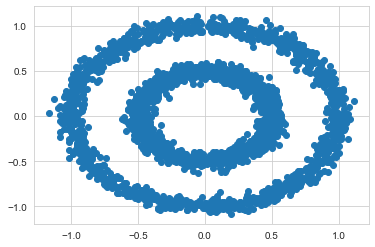

In [3]:
plt.scatter(noisy_circles[:, 0], noisy_circles[:, 1])

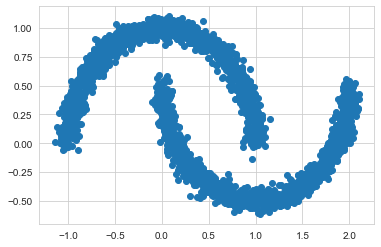

In [4]:
plt.scatter(noisy_moons[:, 0], noisy_moons[:, 1])

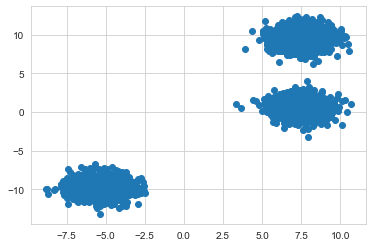

In [5]:
plt.scatter(blobs[:, 0], blobs[:, 1])

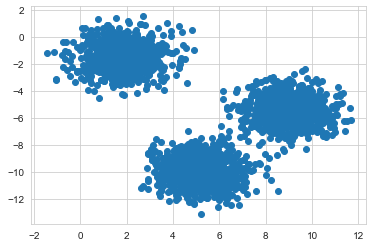

In [6]:
plt.scatter(X[:, 0], X[:, 1])

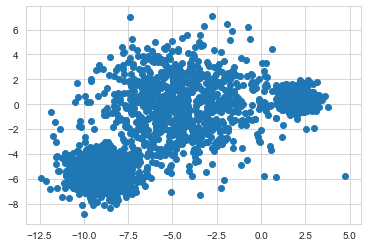

In [7]:
plt.scatter(varied[:, 0], varied[:, 1])

In [8]:
colors = ['royalblue', 'goldenrod', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'maroon', 'lightcyan',
          'navy', 'red', 'blue', 'green']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

In [9]:
n_cluster = NumberClusterFinder(X)
n_cluster.generateDistance()

array([[0.00000000e+00, 5.46427432e-04, 7.22479031e-03, ...,
        8.85941052e-02, 9.74725949e-02, 1.12534419e-01],
       [0.00000000e+00, 5.46427432e-04, 9.26286077e-03, ...,
        9.49279942e-02, 1.05634968e-01, 1.13737397e-01],
       [0.00000000e+00, 3.18862073e-03, 9.26286077e-03, ...,
        9.71475465e-02, 1.07322303e-01, 1.15614690e-01],
       ...,
       [0.00000000e+00, 7.51627506e-01, 8.51300408e-01, ...,
        1.36671564e+00, 1.37920270e+00, 1.42142028e+00],
       [0.00000000e+00, 8.37504592e-01, 9.35428539e-01, ...,
        1.43000760e+00, 1.51813043e+00, 1.60455116e+00],
       [0.00000000e+00, 8.37872507e-01, 1.01277780e+00, ...,
        1.57585458e+00, 1.58949853e+00, 1.63540527e+00]])

In [10]:
n_cluster.find()

0.35458870240720475

In [11]:
m = DensityKmeans(noisy_moons)
m.fit()
print(" silhouette_score ", silhouette_score(noisy_moons, m.labels_, metric='euclidean'))

 silhouette_score  0.4465727095416069


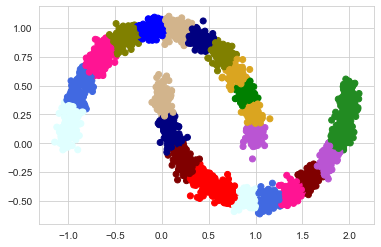

In [12]:
plt.scatter(noisy_moons[:, 0], noisy_moons[:, 1], c=vectorizer(m.labels_))

In [25]:
dbscan = DBSCAN(eps=0.2)
dbscan.fit(noisy_moons)
y = dbscan.labels_
print("k = 7", " silhouette_score ", silhouette_score(noisy_moons, y, metric='euclidean'))

k = 7  silhouette_score  0.33527000156784287


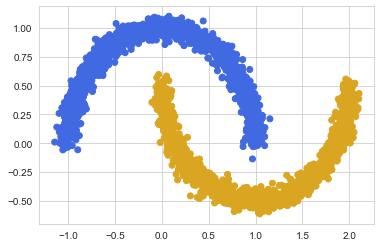

In [26]:
plt.scatter(noisy_moons[:, 0], noisy_moons[:, 1], c=vectorizer(dbscan.labels_))

In [29]:
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(noisy_moons)
y = kmeans.labels_
print("silhouette_score ", silhouette_score(noisy_moons, y, metric='euclidean'))

silhouette_score  0.49011522303499006


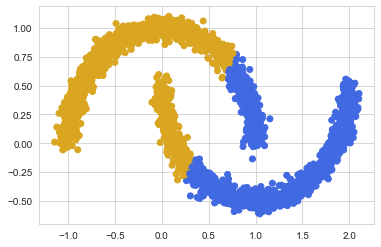

In [30]:
plt.scatter(noisy_moons[:, 0], noisy_moons[:, 1], c=vectorizer(kmeans.labels_))